In [3]:
import pandas as pd

csv_path = r'C:\Users\leona\pyhtonscripts\ExperimentoNovos\KfoldPetroTunerIndicatorV1Micro\summary_model_performance_with_hyperparams (Micro).csv'

df = pd.read_csv(csv_path)

best_mae = df.loc[df['Avg MAE'].idxmin()]
print(f"Melhor janela baseada em Avg MAE: {best_mae['Days']} dias")
print(f"best_mae: {best_mae['Avg MAE']}")

best_mse = df.loc[df['Avg MSE'].idxmin()]
print(f"Melhor janela baseada em Avg MSE: {best_mse['Days']} dias")
print(f"best_mse: {best_mse['Avg MSE']}")

best_rmse = df.loc[df['Avg RMSE'].idxmin()]
print(f"Melhor janela baseada em Avg RMSE: {best_rmse['Days']} dias")
print(f"best_rmse: {best_rmse['Avg RMSE']}")

best_r2 = df.loc[df['Avg R²'].idxmax()]
print(f"Melhor janela baseada em Avg R²: {best_r2['Days']} dias")
print(f"best_r2: {best_r2['Avg R²']}")

Melhor janela baseada em Avg MAE: 1.0 dias
best_mae: 0.1377250247773566
Melhor janela baseada em Avg MSE: 1.0 dias
best_mse: 0.0383332951067641
Melhor janela baseada em Avg RMSE: 1.0 dias
best_rmse: 0.1862134973329127
Melhor janela baseada em Avg R²: 1.0 dias
best_r2: 0.9767310846253464


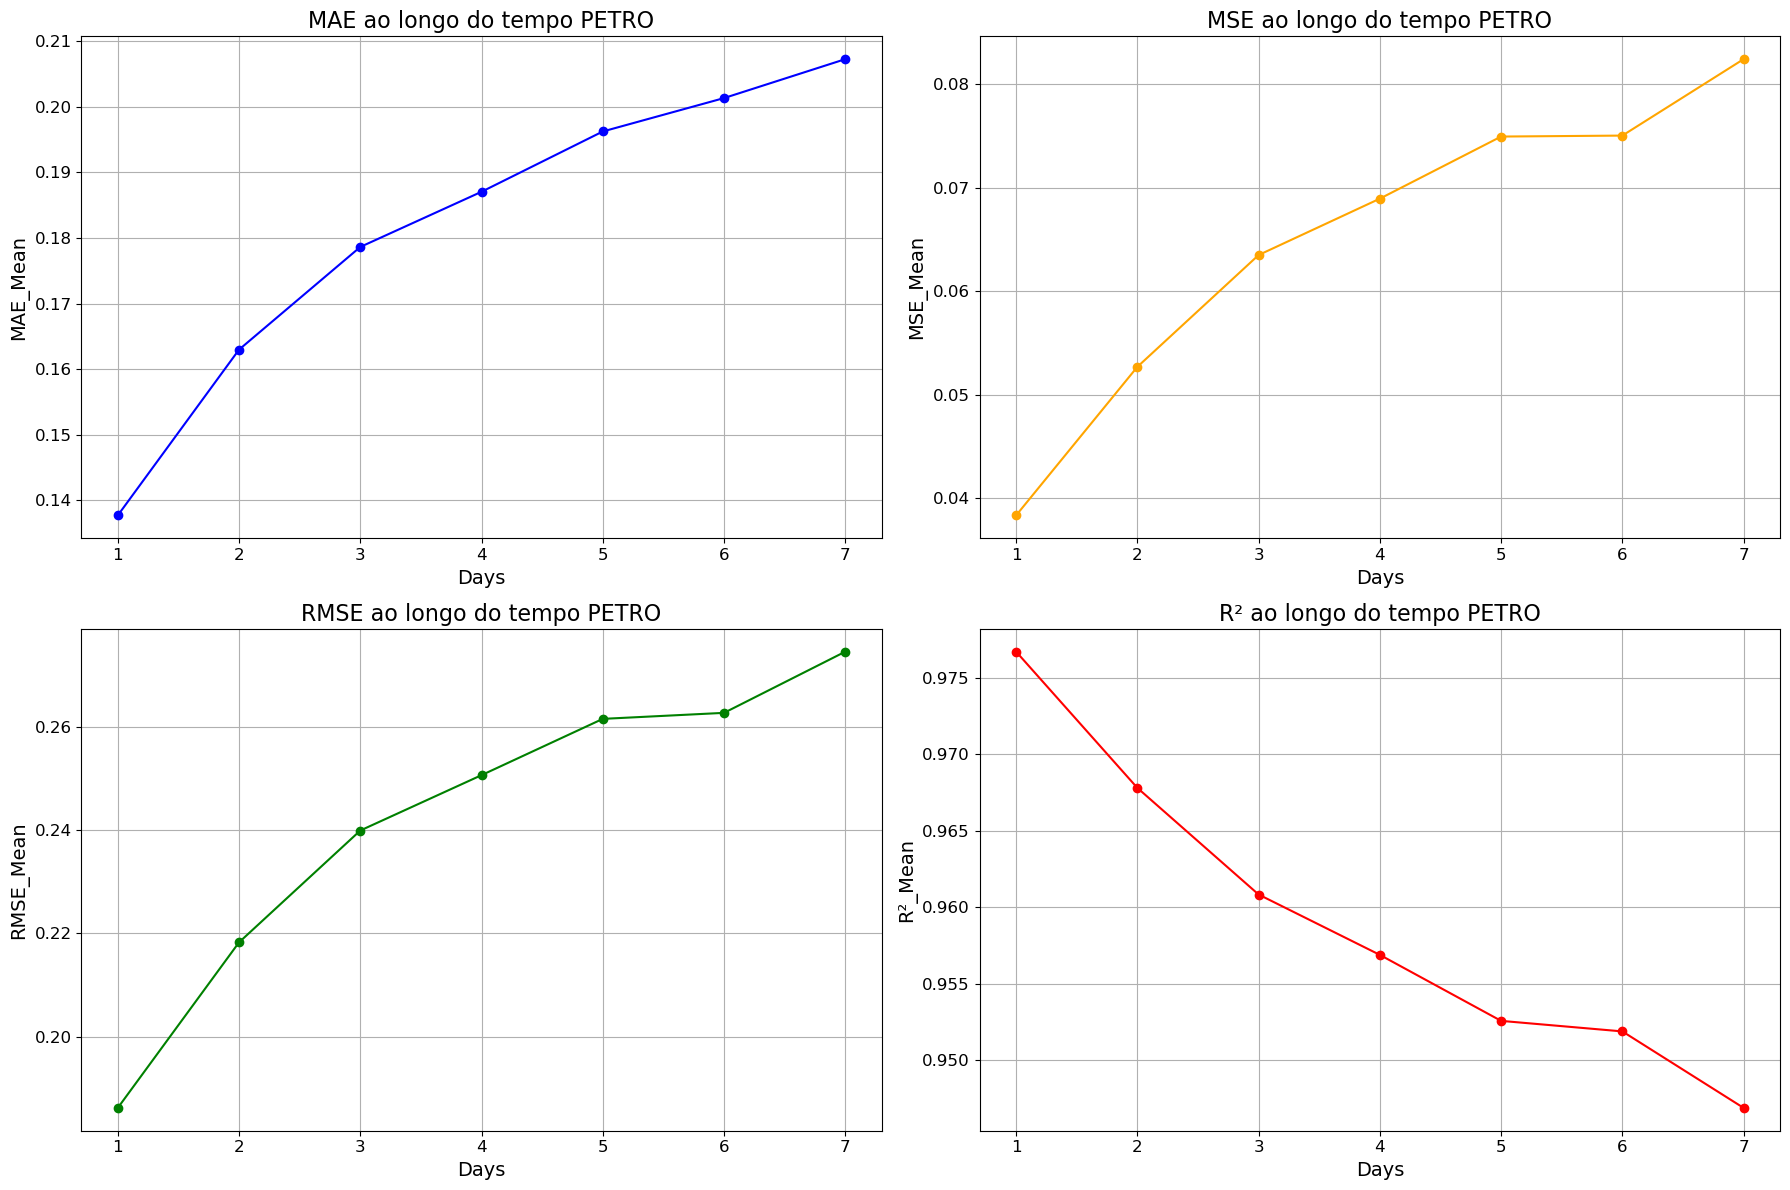

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Caminho para o arquivo CSV
csv_path = r'C:\Users\leona\pyhtonscripts\ExperimentoNovos\KfoldPetroTunerIndicatorV1Micro\summary_model_performance_with_hyperparams (Micro).csv'

# Lê os dados do CSV
df = pd.read_csv(csv_path)

# Agrupa os dados por 'Days' e calcula a média e o desvio padrão para cada métrica
grouped = df.groupby('Days').agg({
    'Avg MAE': ['mean', 'std'],
    'Avg MSE': ['mean', 'std'],
    'Avg RMSE': ['mean', 'std'],
    'Avg R²': ['mean', 'std']
}).reset_index()

# Renomeia as colunas para facilitar o acesso
grouped.columns = ['Days', 'MAE_Mean', 'MAE_Std', 'MSE_Mean', 'MSE_Std', 'RMSE_Mean', 'RMSE_Std', 'R²_Mean', 'R²_Std']

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.errorbar(grouped['Days'], grouped['MAE_Mean'], yerr=grouped['MAE_Std'], marker='o', capsize=5, color='blue')
plt.title('MAE ao longo do tempo PETRO', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('MAE_Mean', fontsize=14)
plt.xticks(np.arange(1, 8, 1), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.subplot(2, 2, 2)
plt.errorbar(grouped['Days'], grouped['MSE_Mean'], yerr=grouped['MSE_Std'], marker='o', capsize=5, color='orange')
plt.title('MSE ao longo do tempo PETRO', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('MSE_Mean', fontsize=14)
plt.xticks(np.arange(1, 8, 1), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.subplot(2, 2, 3)
plt.errorbar(grouped['Days'], grouped['RMSE_Mean'], yerr=grouped['RMSE_Std'], marker='o', capsize=5, color='green')
plt.title('RMSE ao longo do tempo PETRO', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('RMSE_Mean', fontsize=14)
plt.xticks(np.arange(1, 8, 1), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.subplot(2, 2, 4)
plt.errorbar(grouped['Days'], grouped['R²_Mean'], yerr=grouped['R²_Std'], marker='o', capsize=5, color='red')
plt.title('R² ao longo do tempo PETRO', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('R²_Mean', fontsize=14)
plt.xticks(np.arange(1, 8, 1), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()